# Predicting On given conditions, whether major accidents or not

### Hariharan Devarajan

<b>Project description:</b><br>
For all the conditions given the model will predict the chances of a major accident occuring. Here major accident is defined as involvement of more than one vehicle. The motivation behind this is the fact that Accidents in the Country are generally on large scale. This model could help predict when these occure.

In [2]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import BernoulliRBM

from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
import numpy as np
# The error metric. In this case, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

# An efficient data structure. 
import pandas as pd

C:\Users\manih\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\manih\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


<b>Loading the data</b>

In [6]:
df = pd.read_csv("train.csv")

C:\Users\manih\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,55,56,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<b>Looking at the columns</b>

In [7]:
df.columns

Index(['OBJECTID', 'geodb_oid', 'ROUTE', 'Case_Id', 'YEAR', 'MONTH', 'DAY',
       'HOUR', 'DAY_O_WEEK', 'NUM_VEH', 'INJURIES', 'FATALITIES', 'COLL_TYPE',
       'WEATHER', 'LIGHTING', 'SURF_COND', 'RD_DEFECT', 'RD_FEATURE',
       'TRAF_CNTRL', 'COUNTY', 'TOWNSHIP', 'TS_ROUTE', 'MILE', 'CITY',
       'DRIVER_1', 'VEH1_TYPE', 'VEH1_SPECL', 'VEH1_DIR', 'VEH1_MANUV',
       'VEH1_EVNT1', 'VEH1_LOC1', 'VEH1_EVNT2', 'VEH1_LOC2', 'VEH1_EVNT3',
       'VEH1_LOC3', 'DRIVER_2', 'VEH2_TYPE', 'VEH2_SPECL', 'VEH2_DIR',
       'VEH2_MANUV', 'VEH2_EVNT1', 'VEH2_LOC1', 'VEH2_EVNT2', 'VEH2_LOC2',
       'VEH2_EVNT3', 'VEH2_LOC3', 'DRIVER_3', 'VEH3_TYPE', 'VEH3_SPECL',
       'VEH3_DIR', 'VEH3_MANUV', 'VEH3_EVNT1', 'VEH3_LOC1', 'VEH3_EVNT2',
       'VEH3_LOC2', 'VEH3_EVNT3', 'VEH3_LOC3', 'DRIVER_4', 'VEH4_TYPE',
       'VEH4_SPECL', 'VEH4_DIR', 'VEH4_MANUV', 'VEH4_EVNT1', 'VEH4_LOC1',
       'VEH4_EVNT2', 'VEH4_LOC2', 'VEH4_EVNT3', 'VEH4_LOC3', 'DUP_CD',
       'REC_TYPE', 'XCOORD', 'YCOORD', 'INTERSE

<b>Dropping columns which have no impact on number of vehicles or These are effects of collision</b>

In [8]:
df.drop(['SFE','OBJECTID','geodb_oid','Case_Id','YEAR','INJURIES', 'FATALITIES', 'COLL_TYPE','VEH1_EVNT2', 'VEH1_EVNT3'],axis=1,inplace=True)

<b>Checking data amount</b>

In [9]:
print(len( df))

292019


<b>Check some stats of data</b>

In [10]:
df.describe()

,MONTH,DAY,HOUR,NUM_VEH,COUNTY,TS_ROUTE,MILE,DUP_CD,XCOORD,YCOORD,AGENCY_NUM,RUNDATE
count,292019.000000,292019.000000,292019.000000,292019.000000,292019.000000,292019.000000,292019.000000,2.920190e+05,2.920190e+05,2.920190e+05,292019.000000,2.920190e+05
mean,6.438341,15.352614,13.017300,1.869991,36.611871,2013.419617,30.620734,3.681322e+08,2.807454e+06,1.712982e+06,15899.361422,2.016091e+09
std,3.571892,8.755899,5.594693,0.580815,28.735929,3089.644853,64.296513,2.875539e+08,2.241654e+05,4.066943e+05,7250.743849,0.000000e+00
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+07,1.927759e+06,1.152106e+05,10005.000000,2.016091e+09
25%,3.000000,8.000000,9.000000,2.000000,16.000000,0.000000,0.000000,1.600000e+08,2.755127e+06,1.752016e+06,11051.000000,2.016091e+09
50%,6.000000,15.000000,14.000000,2.000000,16.000000,0.000000,0.000000,1.690941e+08,2.902607e+06,1.880197e+06,13300.000000,2.016091e+09
75%,10.000000,23.000000,17.000000,2.000000,54.000000,5025.000000,30.940000,5.420550e+08,2.963601e+06,1.935079e+06,20011.000000,2.016091e+09
max,12.000000,31.000000,23.000000,15.000000,102.000000,9474.000000,424.630000,1.029074e+09,3.051970e+06,2.130862e+06,99999.000000,2.016091e+09


<b>removing information of other vehicles which participated in accident</b>

In [11]:
df.drop(['DRIVER_2', 'VEH2_TYPE', 'VEH2_SPECL', 'VEH2_DIR',
       'VEH2_MANUV', 'VEH2_EVNT1', 'VEH2_LOC1', 'VEH2_EVNT2', 'VEH2_LOC2',
       'VEH2_EVNT3', 'VEH2_LOC3', 'DRIVER_3', 'VEH3_TYPE', 'VEH3_SPECL',
       'VEH3_DIR', 'VEH3_MANUV', 'VEH3_EVNT1', 'VEH3_LOC1', 'VEH3_EVNT2',
       'VEH3_LOC2', 'VEH3_EVNT3', 'VEH3_LOC3', 'DRIVER_4', 'VEH4_TYPE',
       'VEH4_SPECL', 'VEH4_DIR', 'VEH4_MANUV', 'VEH4_EVNT1', 'VEH4_LOC1',
       'VEH4_EVNT2', 'VEH4_LOC2', 'VEH4_EVNT3', 'VEH4_LOC3','AGENCY_NUM'],axis=1,inplace=True)

<b>Select Categorical columns</b>

In [12]:
df.select_dtypes(['object']).columns

Index(['ROUTE', 'DAY_O_WEEK', 'WEATHER', 'LIGHTING', 'SURF_COND', 'RD_DEFECT',
       'RD_FEATURE', 'TRAF_CNTRL', 'TOWNSHIP', 'CITY', 'DRIVER_1', 'VEH1_TYPE',
       'VEH1_SPECL', 'VEH1_DIR', 'VEH1_MANUV', 'VEH1_EVNT1', 'VEH1_LOC1',
       'VEH1_LOC2', 'VEH1_LOC3', 'REC_TYPE', 'INTERSEC', 'WorkZone',
       'WorkZoneTy', 'WorkersPre', 'ExceedSpee', 'CellPhoneU'],
      dtype='object')

<b>Looking at Stats of Categorical Columns</b>

In [13]:
df.select_dtypes(['object']).describe()

,ROUTE,DAY_O_WEEK,WEATHER,LIGHTING,SURF_COND,RD_DEFECT,RD_FEATURE,TRAF_CNTRL,TOWNSHIP,CITY,...,VEH1_LOC1,VEH1_LOC2,VEH1_LOC3,REC_TYPE,INTERSEC,WorkZone,WorkZoneTy,WorkersPre,ExceedSpee,CellPhoneU
count,113528,292019,284145,285219,281465,254945,292019,287605,292019,292002,...,287175,41204,10635,291902,292019,292019,292019,292019,292019,292019
unique,242,7,8,5,6,6,4,14,82,1131,...,5,5,5,5,2,2,5,2,2,2
top,I 094,Fri,Clear,Daylight,Dry,No Defects,Not Applicable,No Controls,0,Chicago,...,On Pavement (Roadway),Off Pavement - Right,Off Pavement - Right,PD,N,N,(N/A),N,N,N
freq,6997,48324,225001,189318,201751,246404,283737,142722,89680,81480,...,212410,19208,5223,230557,190866,287598,287764,290608,289222,292009


<b>Looking Specifically at the Target</b>

In [14]:
df['NUM_VEH'].describe()

count    292019.000000
mean          1.869991
std           0.580815
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          15.000000
Name: NUM_VEH, dtype: float64

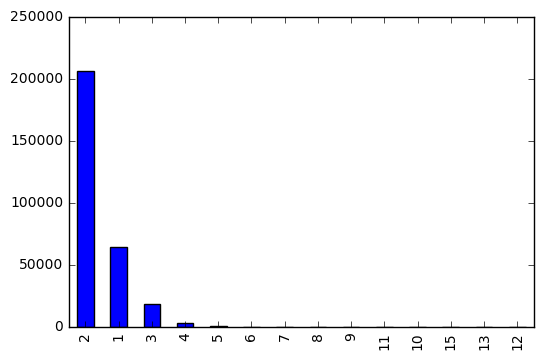

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
frequency=pd.value_counts(df['NUM_VEH'].values, sort=True)
fig, ax = plt.subplots()
frequency.plot(ax=ax, kind='bar')

In [11]:
df['NUM_VEH'].unique()

array([ 1,  2,  8,  3,  4,  5,  6,  7,  9, 10, 15, 11, 12, 13], dtype=int64)

<b>Looking at Count of each class to ensure good data for each side.</b>

In [12]:
pd.value_counts(df['NUM_VEH'].values, sort=True)

2     206213
1      64244
3      17933
4       2893
5        526
6        141
7         37
8         13
9         10
11         3
10         3
15         1
13         1
12         1
dtype: int64

<b>As Said We will make it bianary at > 1</b>

In [13]:
df['NUM_VEH'] =np.where(df['NUM_VEH']>1, 1, 0)

In [14]:
pd.value_counts(df['NUM_VEH'].values, sort=True)

1    227775
0     64244
dtype: int64

<b>Checking what would a basic guess would look like</b>

In [15]:
#if always 1
prob=227775/(64244+227775)
print(prob)

0.780000616398248


<b>Looking at stats of The target</b>

In [16]:
df['NUM_VEH'].describe()

count    292019.000000
mean          0.780001
std           0.413910
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: NUM_VEH, dtype: float64

In [17]:
df.select_dtypes(['object']).describe()

,ROUTE,DAY_O_WEEK,WEATHER,LIGHTING,SURF_COND,RD_DEFECT,RD_FEATURE,TRAF_CNTRL,TOWNSHIP,CITY,...,VEH1_LOC1,VEH1_LOC2,VEH1_LOC3,REC_TYPE,INTERSEC,WorkZone,WorkZoneTy,WorkersPre,ExceedSpee,CellPhoneU
count,113528,292019,284145,285219,281465,254945,292019,287605,292019,292002,...,287175,41204,10635,291902,292019,292019,292019,292019,292019,292019
unique,242,7,8,5,6,6,4,14,82,1131,...,5,5,5,5,2,2,5,2,2,2
top,I 094,Fri,Clear,Daylight,Dry,No Defects,Not Applicable,No Controls,0,Chicago,...,On Pavement (Roadway),Off Pavement - Right,Off Pavement - Right,PD,N,N,(N/A),N,N,N
freq,6997,48324,225001,189318,201751,246404,283737,142722,89680,81480,...,212410,19208,5223,230557,190866,287598,287764,290608,289222,292009


### Now I will handle categorical values 

In [18]:
categoricalColumns=['ROUTE','VEH1_TYPE', 'DAY_O_WEEK', 'WEATHER', 'LIGHTING', 'SURF_COND',
       'RD_DEFECT', 'RD_FEATURE', 'TRAF_CNTRL', 'CITY', 'DRIVER_1',
        'VEH1_DIR', 'VEH1_MANUV', 'VEH1_EVNT1','INTERSEC', 'WorkZone', 'WorkZoneTy', 'WorkersPre',
       'ExceedSpee', 'CellPhoneU']

<b>Dropping Rows with NA in them</b>

In [19]:
df[categoricalColumns]=df[categoricalColumns].dropna(axis=0)

<b>Analysing Each Categorical Column by their values and Types</b>

In [20]:
for column in df.columns:
    print(column)
    print(df[column].unique())

ROUTE
[nan 'IL084' 'I 088' 'IL035' 'I 090' 'US020' 'US012' 'IL003' 'IL150'
 'IL013' 'IL004' 'IL156' 'IL015' 'IL159' 'IL154' 'IL155' 'IL096' 'US054'
 'IL100' 'IL107' 'I 072' 'IL106' 'IL016' 'IL108' 'IL111' 'US067' 'IL109'
 'IL267' 'IL078' 'I 072B' 'IL104' 'I 055' 'IL138' 'I 255' 'I 064' 'I 070'
 'IL203' 'IL158' 'IL015*' 'IL157' 'US050' 'IL140' 'IL255' 'I 270' 'IL143'
 'IL162' 'US040' 'IL161' 'IL163' 'IL159*' 'IL111*' 'IL177' 'IL160' 'IL127'
 'IL185' 'I 057' 'US051' 'IL037' 'US051*' 'IL161*' 'IL048' 'IL029' 'I 055B'
 'IL128' 'IL121' 'IL033' 'US045' 'IL032' 'IL133' 'IL049' 'IL130' 'IL250'
 'US045*' 'I 024' 'IL146' 'IL147' 'IL166' 'IL148' 'IL169' 'US060' 'IL151'
 'IL149' 'IL152' 'IL153' 'IL142' 'IL014' 'IL013*' 'IL184' 'IL034' 'IL014*'
 'IL001' 'IL242' 'IL141' 'IL142*' 'IL145' 'US024' 'I 172' 'US024*' 'IL057*'
 'IL057' 'IL110' 'IL061' 'IL094' 'US136' 'IL099' 'IL101' 'IL103' 'IL135'
 'US034' 'IL009' 'IL164' 'IL116' 'IL097' 'IL041' 'IL095' 'I 074' 'US150'
 'IL167' 'IL091' 'IL017' 'IL090' 'IL

<b>Removing uncessary categorical Columns</b>

In [21]:
df.drop(['TOWNSHIP','VEH1_SPECL','VEH1_LOC1','VEH1_LOC2','VEH1_LOC3','DUP_CD','REC_TYPE','RUNDATE'],axis=1,inplace=True)

<b>Convert Categorical Data into Numerical</b>

In [22]:
for column in categoricalColumns:
    dummies = pd.get_dummies(df[column], prefix=column)
    # Update X to include dummies and drop the main variable
    df = pd.concat([df, dummies], axis=1)
    df.drop([column], axis=1, inplace=True)

<b>As Categorical Columns have no NA and all have been converted to numerical we can fill the original numerical columns with their mean where na is encountered</b>

In [23]:
for column in df.columns:
    #print(column)
    df[column].fillna(df[column].mean(), inplace=True)

<b>Double check each column for its values and types</b>

In [24]:
for column in df.columns:
    print(column)
    print(df[column].unique())

MONTH
[ 3  1  5  4  2  6  7  8  9 10 11 12]
DAY
[ 5 19  9 10 28 18 14 24  7 31  1  3  6 16  8 17 30 12 22 23 29  2 13 15 27
 25 11 26  4 21 20]
HOUR
[12  6 21 14 17 11  3  8 20  9 23 18  0 19 13  5 22  7  1 10 16  4 15  2]
NUM_VEH
[0 1]
COUNTY
[ 43  16  81  98   7  67  79  82  95  75  86  31  42  59  69  84  68  60
  14   3  26  61  25  41  11  87  58  70  18  15  21  23  12  17  40  80
  24  96  13  93   2  91  44 100  77  64  39  73  28  83  33  97  30  76
  35   1  34  55  85   5  94  36  66  48  29  50  72  88  90   9  63  65
   8  89  71  37   6 101  99   4  46  78  62  52  19  56  45  49  22  32
  47  10  57  92 102  27  54  20  53  38  74  51]
TS_ROUTE
[   0 5084 9088 5035 1012 9090 1020 1041 5003 5150 5013 5004 5156 5015 5159
 5154 5155 5096 1054 5100 5107 9072 5106 5016 5108 1067 5111 5109 5267 5078
 2072 5104 9055 5138 9255 9064 9070 5203 5157 5158 6015 1050 5140 9270 5255
 5143 5162 1040 5161 5163 6159 6111 5177 5160 5127 5185 9057 1051 5037 4051
 6161 5048 5029 2055 5128 51

<b>As we dropped some rows CHeck the data set</b>

In [25]:
len(df)

292019

<b>Separate the target class</b>

In [26]:
y=df.pop('NUM_VEH')

<b>As the data set is huge enough aroung 300k records, Plus i am planning to use the bagging and boosting techniques for modelling the data. I will use Train-Validation-Test Split</b>

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=.2, random_state=42)

<b>Define all the classifiers i will be using for base</b>

In [28]:
def getAccuracyLR(X_train,y_train,X_test,y_test):
    num_instances = len(X_train)
    model = LogisticRegression()
    numeric_variables = list(X_train.dtypes[X_train.dtypes != "object"].index)
    model.fit(X_train, y_train)
    gbm_prob = model.predict_proba(X_test)[:, 1]
    gbm_preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, gbm_preds)
    auc = roc_auc_score(y_test, gbm_prob)
    return accuracy,auc,model.coef_
def getAccuracyRFC(X_train,y_train,X_test,y_test,seed = 7,num_trees = 100,max_depth=3,min_samples_split=2,min_samples_leaf=1,subsample=1,max_features=None,max_leaf_nodes=None):
    num_instances = len(X_train)
    model = RandomForestClassifier(n_estimators=num_trees, random_state=seed,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features,max_leaf_nodes=max_leaf_nodes)
    numeric_variables = list(X_train.dtypes[X_train.dtypes != "object"].index)
    model.fit(X_train, y_train)
    gbm_prob = model.predict_proba(X_test)[:, 1]
    gbm_preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, gbm_preds)
    auc = roc_auc_score(y_test, gbm_prob)
    return accuracy,auc,model.feature_importances_
def getAccuracyAda(X_train,y_train,X_test,y_test):
    num_instances = len(X_train)
    model = AdaBoostClassifier()
    numeric_variables = list(X_train.dtypes[X_train.dtypes != "object"].index)
    model.fit(X_train, y_train)
    gbm_prob = model.predict_proba(X_test)[:, 1]
    gbm_preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, gbm_preds)
    auc = roc_auc_score(y_test, gbm_prob)
    return accuracy,auc,model.feature_importances_
def getAccuracyBagC(X_train,y_train,X_test,y_test):
    num_instances = len(X_train)
    model = BaggingClassifier()
    numeric_variables = list(X_train.dtypes[X_train.dtypes != "object"].index)
    model.fit(X_train, y_train)
    gbm_prob = model.predict_proba(X_test)[:, 1]
    gbm_preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, gbm_preds)
    auc = roc_auc_score(y_test, gbm_prob)
    return accuracy,auc,model.estimators_features_
def getAccuracyETC(X_train,y_train,X_test,y_test):
    num_instances = len(X_train)
    model = ExtraTreesClassifier()
    numeric_variables = list(X_train.dtypes[X_train.dtypes != "object"].index)
    model.fit(X_train, y_train)
    gbm_prob = model.predict_proba(X_test)[:, 1]
    gbm_preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, gbm_preds)
    auc = roc_auc_score(y_test, gbm_prob)
    return accuracy,auc,model.feature_importances_
def getAccuracyRTE(X_train,y_train,X_test,y_test):
    num_instances = len(X_train)
    model = RandomTreesEmbedding()
    numeric_variables = list(X_train.dtypes[X_train.dtypes != "object"].index)
    model.fit(X_train, y_train)
    gbm_prob = model.predict_proba(X_test)[:, 1]
    gbm_preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, gbm_preds)
    auc = roc_auc_score(y_test, gbm_prob)
    return accuracy,auc,model.feature_importances_
def getAccuracyMLP(X_train,y_train,X_test,y_test,seed = 7,num_trees = 100,loss='deviance',learning_rate=0.1,max_depth=3,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0,subsample=1,max_features=None,max_leaf_nodes=None):
    num_instances = len(X_train)
    model = MLPClassifier()
    numeric_variables = list(X_train.dtypes[X_train.dtypes != "object"].index)
    model.fit(X_train, y_train)
    gbm_prob = model.predict_proba(X_test)[:, 1]
    gbm_preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, gbm_preds)
    auc = roc_auc_score(y_test, gbm_prob)
    return accuracy,auc,model.coefs_
def getAccuracyGBC(X_train,y_train,X_test,y_test,seed = 7,num_trees = 100,loss='deviance',learning_rate=0.1,max_depth=3,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0,subsample=1,max_features=None,max_leaf_nodes=None):
    num_instances = len(X_train)
    model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed,loss=loss,learning_rate=learning_rate,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,subsample=subsample,max_features=max_features,max_leaf_nodes=max_leaf_nodes)
    numeric_variables = list(X_train.dtypes[X_train.dtypes != "object"].index)
    model.fit(X_train, y_train)
    gbm_prob = model.predict_proba(X_test)[:, 1]
    gbm_preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, gbm_preds)
    auc = roc_auc_score(y_test, gbm_prob)
    return accuracy,auc,model.feature_importances_

<b>First i tried Logistic Regression</b>

In [29]:
accuracy,auc,coef=getAccuracyLR(X_train,y_train,X_validation,y_validation)
print("accuracy : %f\t\tauc : %f"%(accuracy,auc))
print("coeff")
print(coef)

accuracy : 0.782826		auc : 0.641440
coeff
[[ -6.28017304e-09  -3.38917499e-08   5.40594015e-08 ...,  -2.65825688e-09
   -3.64951289e-10  -3.02320817e-09]]


<b>Now I will be trying Bagging and Boosting Technique. The Purpose is I will first see whcih model works best default and then will fine tune each paramemeter of the best base model</b>

<b>Random Forest Classifier</b>

In [30]:
accuracy,auc,features=getAccuracyRFC(X_train,y_train,X_validation,y_validation)
print("accuracy : %f\t\tauc : %f"%(accuracy,auc))
print("features importance")
print(features)

accuracy : 0.847548		auc : 0.764329
features importance
[  3.88359080e-06   5.05376292e-06   3.14679354e-06 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


<b>Ada Classifier</b>

In [31]:
accuracy,auc,features=getAccuracyAda(X_train,y_train,X_validation,y_validation)
print("accuracy : %f\t\tauc : %f"%(accuracy,auc))
print("features")
print(features)

accuracy : 0.874794		auc : 0.880940
features
[ 0.    0.    0.1  ...,  0.02  0.    0.  ]


<b>Bagging Classifier</b>

In [32]:
accuracy,auc,features=getAccuracyBagC(X_train,y_train,X_validation,y_validation)
print("accuracy : %f\t\tauc : %f"%(accuracy,auc))
print("features")
print(features)

accuracy : 0.873424		auc : 0.867343
features
[array([   0,    1,    2, ..., 1316, 1317, 1318]), array([   0,    1,    2, ..., 1316, 1317, 1318]), array([   0,    1,    2, ..., 1316, 1317, 1318]), array([   0,    1,    2, ..., 1316, 1317, 1318]), array([   0,    1,    2, ..., 1316, 1317, 1318]), array([   0,    1,    2, ..., 1316, 1317, 1318]), array([   0,    1,    2, ..., 1316, 1317, 1318]), array([   0,    1,    2, ..., 1316, 1317, 1318]), array([   0,    1,    2, ..., 1316, 1317, 1318]), array([   0,    1,    2, ..., 1316, 1317, 1318])]


<b>Extra Trees Classifier</b>

In [33]:
accuracy,auc,features=getAccuracyETC(X_train,y_train,X_validation,y_validation)
print("accuracy : %f\t\tauc : %f"%(accuracy,auc))
print("features")
print(features)

accuracy : 0.865056		auc : 0.847918
features
[  4.44836998e-02   8.22170659e-02   1.07367337e-01 ...,   1.99324165e-03
   2.01515968e-04   1.03180951e-04]


<b>MultiLayer Perceptron</b>

In [34]:
accuracy,auc,coefs=getAccuracyMLP(X_train,y_train,X_validation,y_validation)
print("accuracy : %f\t\tauc : %f"%(accuracy,auc))
print("coefs_")
print(coefs)

accuracy : 0.781649		auc : 0.500000
coefs_
[array([[  5.80276393e-002,   9.83732662e-005,  -4.08957104e-190, ...,
         -4.40970713e-003,  -3.14393093e-002,   3.58638632e-185],
       [ -3.49570797e-002,   7.48255025e-004,  -4.93795855e-187, ...,
         -8.70728574e-003,   4.32686538e-003,  -1.60897156e-190],
       [  5.69953063e-002,  -1.25358389e-002,   4.05398510e-184, ...,
         -9.07051111e-003,   9.07665875e-002,  -1.12025203e-188],
       ..., 
       [  1.79290399e-001,  -3.08198112e-002,  -1.89418888e-187, ...,
         -7.49606329e-003,   4.20540075e-001,  -7.34075254e-189],
       [ -5.86465695e-001,   2.44417205e-004,  -6.23112433e-190, ...,
          2.84556958e-035,  -1.14131477e+000,  -1.49836418e-188],
       [  2.19319347e-001,  -3.00481520e-002,  -5.81701983e-192, ...,
         -7.43733075e-003,   3.62997050e-001,   1.51623307e-188]]), array([[ -3.90312350e-003],
       [  9.64802064e-006],
       [  7.90584948e-162],
       [  3.94661675e-148],
       [ -8.6

<b>Gradient Boosting Classifier</b>

In [35]:
accuracy,auc,features=getAccuracyGBC(X_train,y_train,X_validation,y_validation)
print("accuracy : %f\t\tauc : %f"%(accuracy,auc))
print("features")
print(features)

accuracy : 0.877341		auc : 0.884480
features
[  1.06967903e-02   7.81330885e-05   1.12217449e-01 ...,   5.13147546e-03
   0.00000000e+00   7.68795756e-02]


<b>As Gradient Boosting Classifier I will be further analysing that</b>

<b>Based on Important Features, I will remove other features and re-modelling</b>

In [36]:
usefulColumns={}
for i in range(len(df.columns)):
    if features[i] > .02:
        usefulColumns[df.columns[i]]=features[i]
print(usefulColumns)

{'VEH1_EVNT1_Pedalcyclist': 0.02441126183767087, 'VEH1_EVNT1_Hit Parked Vehicle': 0.023889911401333123, 'YCOORD': 0.13001793443552465, 'VEH1_EVNT1_Pedestrian': 0.024322746608556288, 'XCOORD': 0.16751322166160545, 'CellPhoneU_N': 0.076879575601414119, 'VEH1_EVNT1_Deer': 0.026350450971261652, 'VEH1_EVNT1_Ran Off Roadway': 0.051010908459343314, 'HOUR': 0.11221744852882852, 'COUNTY': 0.051161578686211809, 'VEH1_EVNT1_Motor Vehicle In Traffic': 0.091594839147895971}


In [41]:
for column in df.columns:
    if column not in usefulColumns:
        df.drop([column],axis=1,inplace=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=.2, random_state=42)

In [43]:
base_accuracy,base_auc,features=getAccuracyGBC(X_train,y_train,X_validation,y_validation)

In [44]:
print("auc")
print(base_auc)
print("accuracy")
print(base_accuracy)

auc
0.885481930967
accuracy
0.878946129315


<b>This is the baseline accuracy i acheived.</b>

<b>Visualise the important Features</b>

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


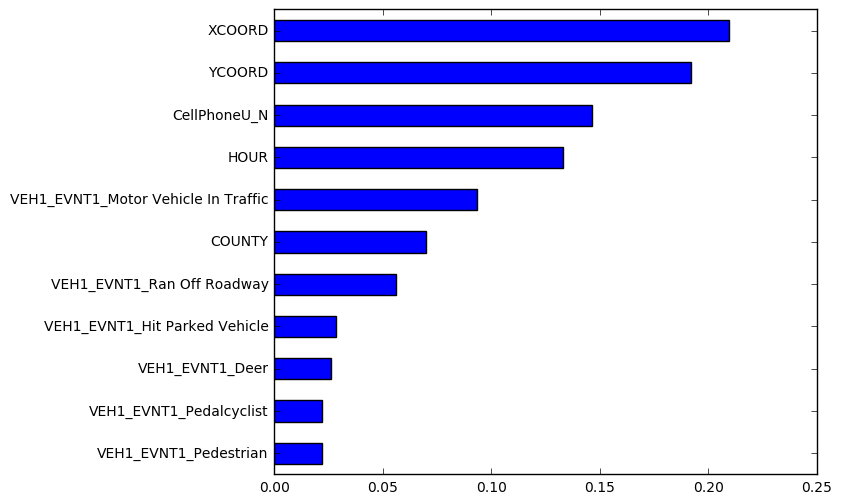

In [45]:
%matplotlib inline
# Simple version that shows all of the variables
feature_importances = pd.Series(features, index=df.columns)
feature_importances.sort(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6));

### I will now fine tune my Model for the below Parameters in Gradient Boosting Classifier 

<table>
<tr><td>Number of Trees</td><td>[30, 50, 100, 200, 500,1000,2000]</td></tr>
<tr><td>Loss</td><td>[30, 50, 100, 200, 500,1000,2000]</td></tr>
<tr><td>Learning Rate</td><td>[.1,.2,.3,.4,.5,.6,.7,.8,.9]</td></tr>
<tr><td>Max Depth</td><td>[1,2,3,4,5,6,7,8,9]</td></tr>
<tr><td>Min Samples Split</td><td>[2,4,8,10]</td></tr>
<tr><td>Min Samples Leafs</td><td>[1,2,5,6,7,8,9,10]</td></tr>
<tr><td>Sub Samples</td><td>[.2,.5,.8,1]</td></tr>
<tr><td>Max Features</td><td>["auto", None, "sqrt", "log2", 0.9, 0.2]</td></tr>
</table>

In [49]:
trees = [30, 50, 100, 200, 500,1000,2000]
losses=['deviance','exponential']
learning_rates=[.1,.2,.3,.4,.5,.6,.7,.8,.9]
max_depts=[1,2,3,4,5,6,7,8,9]
min_samples_splits=[2,4,8,10]
min_samples_leafs=[1,2,5,6,7,8,9,10]
subsamples=[.2,.5,.8,1]
max_features=["auto", None, "sqrt", "log2", 0.9, 0.2]

30
C-stat:
0.879099633798
accuracy
0.867581276887

50
C-stat:
0.881153841279
accuracy
0.872439697793

100
C-stat:
0.885481930967
accuracy
0.878946129315

200
C-stat:
0.888493518251
accuracy
0.882113734135

500
C-stat:
0.892223619133
accuracy
0.884660659632

1000
C-stat:
0.893607172948
accuracy
0.885580977249

2000
C-stat:
0.894601749407
accuracy
0.886330072983



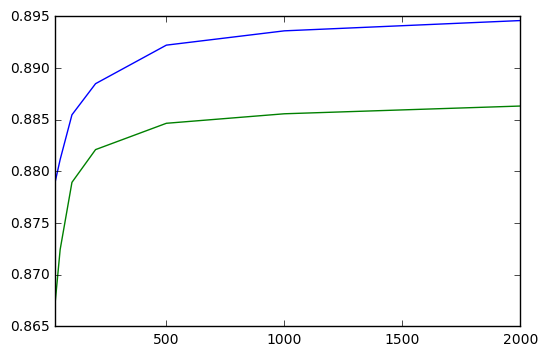

In [51]:
resultsauc = []
resultsacc = []
for tree in trees:
    accuracy,logit_roc_auc,features=getAccuracyGBC(X_train,y_train,X_validation,y_validation,num_trees = tree)
    print(tree)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, trees).plot();
pd.Series(resultsacc, trees).plot();

<b>Will select 500 as change after that is little and Smaller number of trees means Simpler Model</b>

In [52]:
trees_max=500

trees
500
deviance
C-stat:
0.892223619133
accuracy
0.884660659632

exponential
C-stat:
0.892009614221
accuracy
0.883825952957



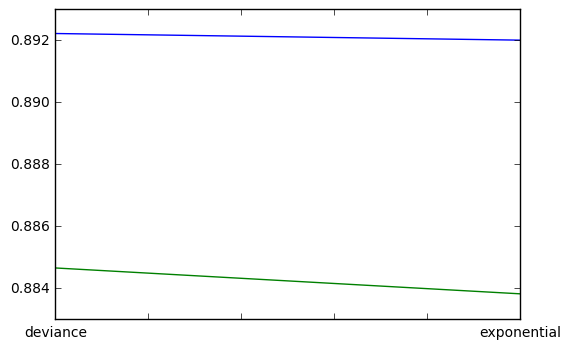

In [53]:
resultsauc = []
resultsacc = []
print("trees")
print(trees_max)
for loss in losses:
    accuracy,logit_roc_auc,features=getAccuracyGBC(X_train,y_train,X_validation,y_validation,loss = loss,num_trees = trees_max)
    print(loss)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, losses).plot();
pd.Series(resultsacc, losses).plot();

<b>The default value deviance looks best</b>

In [54]:
losses_max="deviance"
print("loss")
print(losses_max)

loss
deviance


0.1
C-stat:
0.892223619133
accuracy
0.884660659632

0.2
C-stat:
0.893475291084
accuracy
0.885837810072

0.3
C-stat:
0.894909824905
accuracy
0.88643708666

0.4
C-stat:
0.892949027761
accuracy
0.886693919483

0.5
C-stat:
0.892301400916
accuracy
0.88448943775

0.6
C-stat:
0.892535142145
accuracy
0.884168396721

0.7
C-stat:
0.890468110822
accuracy
0.883890161163

0.8
C-stat:
0.889021656302
accuracy
0.883183870899

0.9
C-stat:
0.887674224229
accuracy
0.882605997046



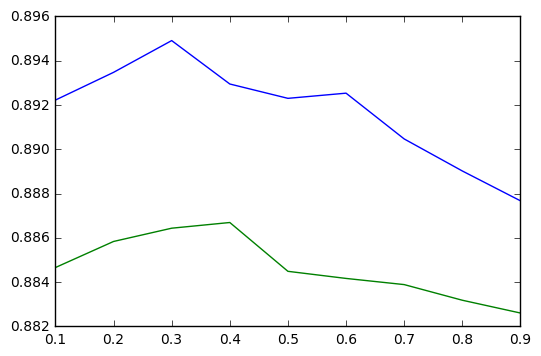

In [55]:
resultsauc = []
resultsacc = []

for learning_rate in learning_rates:
    accuracy,logit_roc_auc,features=getAccuracyGBC(X_train,y_train,X_validation,y_validation,learning_rate = learning_rate,num_trees = trees_max,loss = losses_max)
    print(learning_rate)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, learning_rates).plot();
pd.Series(resultsacc, learning_rates).plot();


<b>The learning Rate of .3 gives Peak AUC with almost best Accuracy</b>

In [56]:
learning_rate_max=.3
print("learning_rate")
print(learning_rate_max)

learning_rate
0.3


1
C-stat:
0.884117782004
accuracy
0.876185176466

2
C-stat:
0.890967324104
accuracy
0.88290563534

3
C-stat:
0.894909824905
accuracy
0.88643708666

4
C-stat:
0.894510138648
accuracy
0.886522697601

5
C-stat:
0.893564961357
accuracy
0.884553645956

6
C-stat:
0.892765800875
accuracy
0.883162468163

7
C-stat:
0.892862050816
accuracy
0.88132183293

8
C-stat:
0.890022128026
accuracy
0.878539477345

9
C-stat:
0.889971001745
accuracy
0.874708387732



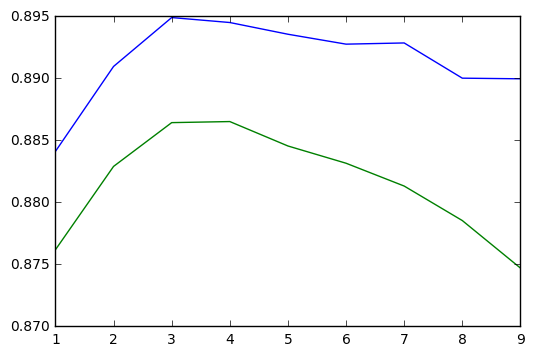

In [57]:
resultsauc = []
resultsacc = []

for max_depth in max_depts:
    accuracy,logit_roc_auc,features=getAccuracyGBC(X_train,y_train,X_validation,y_validation,max_depth = max_depth,num_trees = trees_max,loss = losses_max,learning_rate = learning_rate_max)
    print(max_depth)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, max_depts).plot();
pd.Series(resultsacc, max_depts).plot();

<b>Both Accuracy and AUC reach maximum at Depth=3</b>

In [58]:
max_depts_max=3

2
C-stat:
0.894909824905
accuracy
0.88643708666

4
C-stat:
0.893663110182
accuracy
0.885923421013

8
C-stat:
0.893927501951
accuracy
0.885859212807

10
C-stat:
0.893803403499
accuracy
0.885602379984



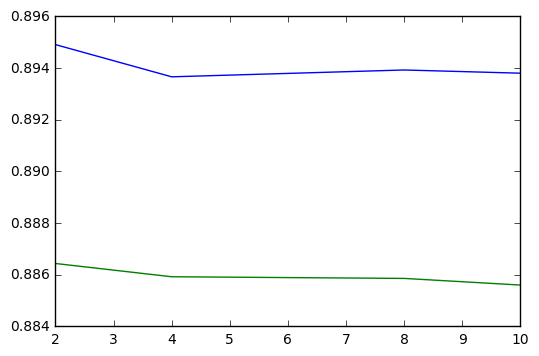

In [59]:
resultsauc = []
resultsacc = []

for min_samples_split in min_samples_splits:
    accuracy,logit_roc_auc,features=getAccuracyGBC(X_train,y_train,X_validation,y_validation,min_samples_split = min_samples_split,max_depth = max_depts_max,num_trees = trees_max,loss = losses_max,learning_rate = learning_rate_max)
    print(min_samples_split)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, min_samples_splits).plot();
pd.Series(resultsacc, min_samples_splits).plot();

<b>Both Accuracy and AUC reach maximum at Min Sample Split=2</b>

In [60]:
min_samples_split_max=2

1
C-stat:
0.894909824905
accuracy
0.88643708666

2
C-stat:
0.894437743523
accuracy
0.886223059307

5
C-stat:
0.894277275066
accuracy
0.886158851101

6
C-stat:
0.894156578501
accuracy
0.887057765982

7
C-stat:
0.894483214753
accuracy
0.886758127689

8
C-stat:
0.894222287944
accuracy
0.887121974188

9
C-stat:
0.893797914852
accuracy
0.886501294865

10
C-stat:
0.894557551705
accuracy
0.887400209747



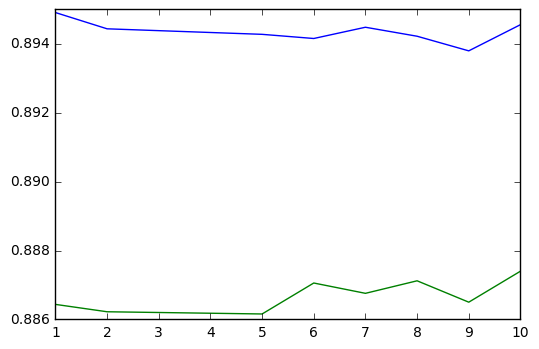

In [61]:
resultsauc = []
resultsacc = []

for min_samples_leaf in min_samples_leafs:
    accuracy,logit_roc_auc,features=getAccuracyGBC(X_train,y_train,X_validation,y_validation,min_samples_leaf = min_samples_leaf,min_samples_split = min_samples_split_max,max_depth = max_depts_max,num_trees = trees_max,loss = losses_max,learning_rate = learning_rate_max)
    print(min_samples_leaf)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, min_samples_leafs).plot();
pd.Series(resultsacc, min_samples_leafs).plot();

<b>Both Accuracy and AUC reach maximum at Min Sample Leafs=10</b>

In [62]:
min_samples_leafs_max=10

0.2
C-stat:
0.890000447197
accuracy
0.883397898251

0.5
C-stat:
0.891915338314
accuracy
0.885880615543

0.8
C-stat:
0.894067852973
accuracy
0.886693919483

1
C-stat:
0.894557551705
accuracy
0.887400209747



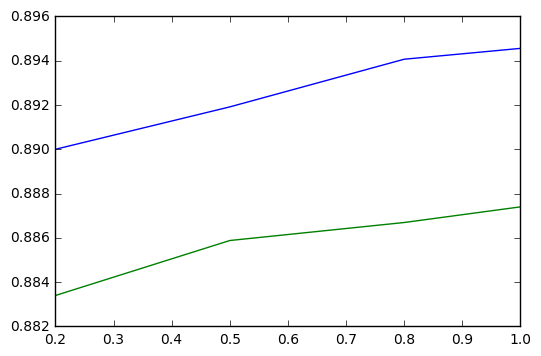

In [63]:
resultsauc = []
resultsacc = []

for subsample in subsamples:
    accuracy,logit_roc_auc,features=getAccuracyGBC(X_train,y_train,X_validation,y_validation,subsample = subsample,min_samples_leaf = min_samples_leafs_max,max_depth = max_depts_max,num_trees = trees_max,loss = losses_max,learning_rate = learning_rate_max)
    print(subsample)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, subsamples).plot();
pd.Series(resultsacc, subsamples).plot();


<b>Both Accuracy and AUC reach maximum at Sub Sample=1</b>

In [64]:
subsample_max=1

auto
C-stat:
0.894557551705
accuracy
0.887400209747

None
C-stat:
0.894557551705
accuracy
0.887400209747

sqrt
C-stat:
0.892493737078
accuracy
0.885409755367

log2
C-stat:
0.892493737078
accuracy
0.885409755367

0.9
C-stat:
0.894177723885
accuracy
0.886608308542

0.2
C-stat:
0.891464446601
accuracy
0.88444663228



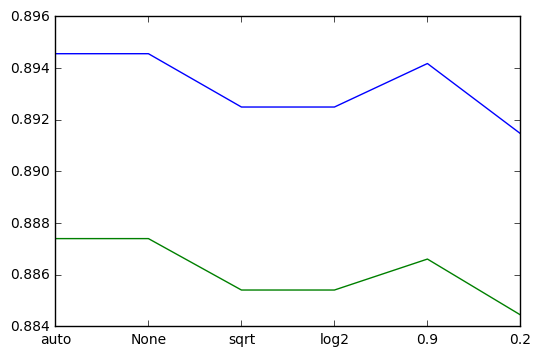

In [65]:
resultsauc = []
resultsacc = []

for max_feature in max_features:
    accuracy,logit_roc_auc,features=getAccuracyGBC (X_train,y_train,X_validation,y_validation,max_features = max_feature,subsample = subsample_max,min_samples_leaf = min_samples_leafs_max,max_depth = max_depts_max,num_trees = trees_max,loss = losses_max,learning_rate = learning_rate_max)
    print(max_feature)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, max_features).plot();
pd.Series(resultsacc, max_features).plot();

<b>Both Accuracy and AUC reach maximum at Max Features=auto and None choosing auto as both have same behaviour</b>

In [66]:
max_feature_max="auto"

### Using Optimised parameter to train the model

In [67]:
best_gbc = GradientBoostingClassifier(n_estimators=trees_max,
                                   random_state=1,
                                   loss=losses_max,
                                   learning_rate=learning_rate_max,
                                   max_depth=max_depts_max,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leafs_max,
                                   subsample=subsample_max,
                                   max_features=max_feature_max)

In [68]:
best_gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=10,
              min_samples_split=10, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=1,
              subsample=1, verbose=0, warm_start=False)

<b>Test it on the test data</b>

In [69]:
gbm_preds = best_gbc.predict(X_test)

In [70]:
y_test.unique()

array([1, 0], dtype=int64)

In [71]:
accuracy = accuracy_score(y_test, gbm_preds)
print(accuracy)

0.883912060818


In [72]:
roc = roc_auc_score(y_test, best_gbc.predict_proba(X_test)[:,1])
print(roc)

0.894103307888


In [73]:
y_hat = gbm_preds

## Conclusions

<b>Accuracy and AUC of validation and test data is similar hence model should perform good on new data</b>

<b>Some metrics</b>

In [74]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1
val=correct / float(total)
print(val)

0.8839120608177522


<b>Classification Report</b>

In [75]:
print(classification_report(y_test, gbm_preds))

             precision    recall  f1-score   support

          0       0.84      0.58      0.69     12940
          1       0.89      0.97      0.93     45464

avg / total       0.88      0.88      0.88     58404



<b>Confusion Matrix</b>

In [76]:
print(confusion_matrix(y_test, gbm_preds))

[[ 7564  5376]
 [ 1404 44060]]
